In [60]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import math

import pandas as pd

from sklearn.metrics import pairwise
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor #, NearestNeighbors

%matplotlib inline

In [76]:
bank_df = pd.read_csv("/Users/superman/Desktop/Education/MBA/Semester-V/BUSI 650/Practice/UniversalBank.csv")



# Drop ID and zip code columns
bank_df = bank_df.drop(columns=['ID','ZIP Code'])

# Make sure that the result is as expected
bank_df.head()


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [77]:
# modify column names
bank_df.columns = [c.replace(' ', '_').replace('=', '_') for c in bank_df.columns]
list(bank_df.columns)

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

In [78]:
# create dummy variables for categorical variable, we consider Education as categorical variable
bank_df['Education'] = bank_df['Education'].astype('category')
bank_df = pd.get_dummies(bank_df, prefix_sep='_', drop_first=False)
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


In [86]:
# split dataset into training (60%) and validation (40%) sets
train_df, valid_df = train_test_split(bank_df, test_size=0.4, random_state=1)
print('Training set:', train_df.shape, 'Validation set:', valid_df.shape)

Training set: (3000, 14) Validation set: (2000, 14)


In [103]:
# new customer
newCustomer = pd.DataFrame([{'Age': 40, 'Experience': 10, 'Income': 84, 'Family': 2, 'CCAvg': 2, 'Mortgage': 0,
                             'Securities_Account': 0, 'CD_Account': 0, 'Online': 1, 'CreditCard': 1, 'Education_1': 0, 
                             'Education_2': 1, 'Education_3': 0}],
                            columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
                                   'CD_Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3'])
newCustomer

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_1,Education_2,Education_3
0,40,10,84,2,2,0,0,0,1,1,0,1,0


In [105]:
# normalize training and validation sets. The transformation is trained using the training set only.
# if you don't convert the integer columns to real numbers (float64), 
# the StandardScaler will raise a DataConversionWarning. This is expected
outcome = 'Personal_Loan'
predictors = list(bank_df.columns)
predictors.remove(outcome)

scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])
scaler.transform(train_df[predictors])
# Transform the predictors of training, validation and newCustomer
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
newCustomerNorm = pd.DataFrame(scaler.transform(newCustomer), 
                               columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
                                   'CD_Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3'])
print(newCustomerNorm)

        Age  Experience    Income    Family     CCAvg  Mortgage  \
0 -0.486446   -0.901063  0.220892 -0.352127  0.035689 -0.559242   

   Securities_Account  CD_Account   Online  CreditCard  Education_1  \
0           -0.337025   -0.252646  0.83419     1.53728    -0.838795   

   Education_2  Education_3  
0     1.591719    -0.660895  


In [118]:
# k-NN using k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [119]:
# predicted class
knn.predict(newCustomerNorm)

/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0])

In [120]:
# predicted probability
knn.predict_proba(newCustomerNorm)

/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[1., 0.]])

# New customer is predicted to not accept a loan offer.

In [121]:
#7.2.b What is a choice of k that balances between overfitting and ignoring the predictor information?
# b Train a classifier for different values of k
results = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
results

,k,accuracy
0,1,0.9545
1,3,0.9535
2,5,0.9565
3,7,0.9520
4,9,0.9475
5,11,0.9465
6,13,0.9450
7,15,0.9440
8,17,0.9415
9,19,0.9405


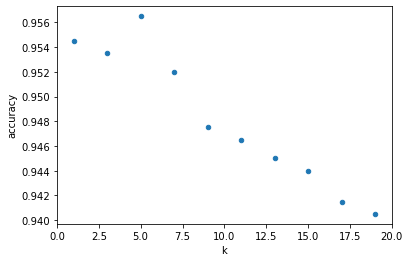

In [122]:
# plot accuracy vs. k
_ = results.plot.scatter(x='k', y='accuracy', xlim=[0, 20])

In [36]:
#We choose the best k, which minimizes the misclassification rate in the validation set. Our best k is k=5

In [123]:
#7.2.c. Show the confusion matrix for the validation data that results from using the best k.
# k-NN model for k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)

knnPredOpt = knn.predict(valid_X)
print(confusion_matrix(valid_y, knnPredOpt))
print('Accuracy :', accuracy_score(valid_y, knnPredOpt))

[[1803    4]
 [  83  110]]
Accuracy : 0.9565


# 7.2.d. Consider the following customer: Run the program after applying 
    Age = 40, Experience = 10, Income = 84,
    Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0,
    Mortgage = 0, Securities Account = 0, CD Account = 0,
    Online = 1 and Credit Card = 1. Classify the customer using the best k.

In [128]:
# predicted class
knn.predict(newCustomerNorm)

/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0])

In [130]:
# predicted probability
knn.predict_proba(newCustomerNorm)

/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[1., 0.]])

In [131]:
#New customer is predicted to not accept a loan offer.

In [133]:
#7.2.e. Repartition the data, this time into training, validation, and test sets (50% : 30% : 20%).
#Apply the k-NN method with the k chosen above. Compare the confusion matrix of the test set with
#that of the training and validation sets. Comment on the differences and their reason.# partition the data into training (50%), validation (30%) and test (20%) sets
#train_df, temp_df = train_test_split(bank_df, test_size=0.5, random_state=1)
#valid_df, test_df = train_test_split(temp_df, test_size=0.3, random_state=1)
# partition the data into training (50%), validation (30%) and test (20%) sets
train_df, temp_df = train_test_split(bank_df, test_size=0.5, random_state=1)
valid_df, temp_df = train_test_split(temp_df, test_size=0.3, random_state=1)
test_df, temp_df = train_test_split(temp_df, test_size=0.2, random_state=1)

print('Training : ', train_df.shape)
print('Validation : ', valid_df.shape)
print('Test : ', test_df.shape)

Training :  (2500, 14)
Validation :  (1750, 14)
Test :  (600, 14)


In [134]:
# normalize training and validation sets. The transformation is trained using the training set only.
# if you don't convert the integer columns to real numbers (float64), 
# the StandardScaler will raise a DataConversionWarning. This is expected
outcome = 'Personal_Loan'
predictors = list(bank_df.columns)
predictors.remove(outcome)

scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training validation and newCustomer
train_X = scaler.transform(train_df[predictors])
train_y = train_df[outcome]
valid_X = scaler.transform(valid_df[predictors])
valid_y = valid_df[outcome]
test_X = scaler.transform(test_df[predictors])
test_y = test_df[outcome]
test_X = pd.DataFrame(test_X, columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
                                   'CD_Account', 'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3'])
test_y = pd.DataFrame(test_y, columns=['Personal_Loan'])

In [135]:
# k-NN model for best k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X, train_y)


KNeighborsClassifier()

In [136]:
# confusion matrix of training set
knnPredOpt = knn.predict(train_X)
print(confusion_matrix(train_y, knnPredOpt))
print('Accuracy :', accuracy_score(train_y, knnPredOpt))

[[2255    4]
 [  75  166]]
Accuracy : 0.9684


In [137]:
# confusion matrix of validation set
knnPredOpt = knn.predict(valid_X)
print(confusion_matrix(valid_y, knnPredOpt))
print('Accuracy :', accuracy_score(valid_y, knnPredOpt))

[[1574    3]
 [  79   94]]
Accuracy : 0.9531428571428572


In [138]:
# confusion matrix of test set
knnPredOpt = knn.predict(test_X)
print(confusion_matrix(test_y, knnPredOpt))
print('Accuracy :', accuracy_score(test_y, knnPredOpt))

[[537   3]
 [ 22  38]]
Accuracy : 0.9583333333333334


/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Note
#The error rate increases from the training set to the validation set, 
#but decreases from the validation set to the test set. The differences are small, but this decreased performance, 
#at least in the test set, is unexpected but we can ignore it as difference is very small - both the training and validation sets are 
#used in setting the optimal k so there can be overfitting. The test set was not used to select the optimal k.